# 단순 선형 회귀(Linear Regression)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

## 아버지와 아들의 키 - Galton

In [7]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [9]:
df.describe()

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


### 아버지와 아들의 키만 발췌

In [12]:
df = df[df.Gender == 'M']

In [13]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [15]:
height = df[['Father', 'Height']].rename(columns={'Height' : 'Son'})
height['Father'] = height.Father * 2.54
height.Son = height.Son * 2.54
height.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


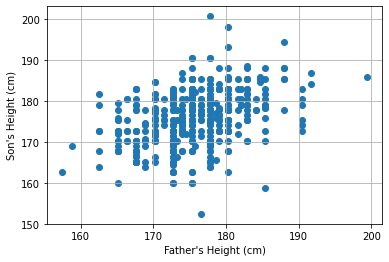

In [18]:
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's Height (cm)")
plt.ylabel("Son's Height (cm)")
plt.grid()
plt.show()

### Numpy 최소 자승법(least square method)

In [19]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [39]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [40]:
# 기울기와 절편
m, c = reg[0]

In [41]:
# 잔차 제곱의 합 (Residual Sum of Square)
rss = reg[1][0]

In [27]:
print(f'기울기 : {m:.4f}, 절편 : {c:.4f}, 잔체제곱 : {rss:.4f}')

기울기 : 0.4477, 절편 : 97.1776, 잔체제곱 : 17556.5995


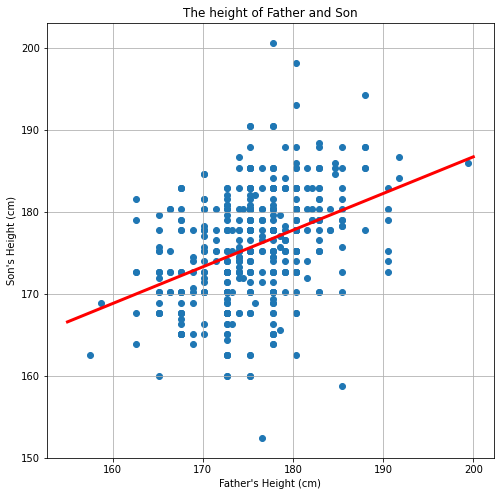

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.plot([155, 200], [m*155+c, m*200+c], 'r', lw=3)
plt.title("The height of Father and Son")
plt.xlabel("Father's Height (cm)")
plt.ylabel("Son's Height (cm)")
plt.grid()
plt.show()

### Scikit-learn의 선형 회귀

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
type(height.Father), type(height.Father.values), height.Father.values.shape

(pandas.core.series.Series, numpy.ndarray, (465,))

In [34]:
X = height.Father.values.reshape(-1,1)
y = height.Son.values

In [35]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [38]:
weight, bias = lr.coef_, lr.intercept_
residue = lr._residues
print(f'기울기 : {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱 : {residue:.4f}')

기울기 : 0.4477, 절편: 97.1776, 잔차제곱 : 17556.5995


In [43]:
# Scikit-learn 결과 = numpy 최소 자ㅡ\
print(f'기울기 : {m:.4f}, 절편 : {c:.4f}, 잔차제곱 : {rss:.4f}')

기울기 : 0.4477, 절편 : 97.1776, 잔차제곱 : 17556.5995


# 평가지표로 R_squared score 

In [47]:
score = lr.score(X, y)
print(f'R_Squared score : {score:.4f}')

R_Squared score : 0.1531


## 당뇨병 데이터셋

In [48]:
from sklearn.datasets import load_diabetes

In [52]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### 당뇨병 vs BMI

In [55]:
X = df.bmi.values.reshape(-1, 1)
y = df.target.values

In [56]:
X.shape

(442, 1)

In [57]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [58]:
weight, bias = lr.coef_, lr.intercept_
residue = lr._residues
print(f'기울기 : {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱 : {residue:.4f}')

기울기 : 949.4353, 절편: 152.1335, 잔차제곱 : 1719581.8108


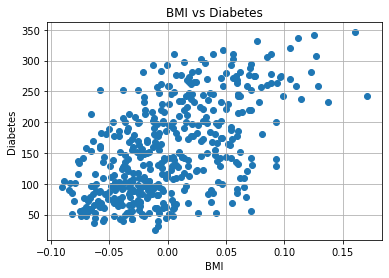

In [60]:
# plt.figure(figsize=(8,8))
plt.scatter(X, y)
# plt.plot([155, 200], [weight[0]*155+c, m*200+c], 'r', lw=3)
plt.title("BMI vs Diabetes")
plt.xlabel("BMI")
plt.ylabel("Diabetes")
plt.grid()
plt.show()

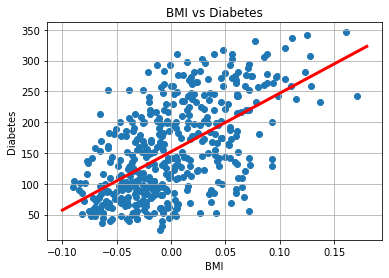

In [61]:
plt.scatter(X, y)
plt.plot([-0.1, 0.18], [weight[0]*-0.1+bias, weight[0]*0.18+bias], 'r', lw=3)
plt.title("BMI vs Diabetes")
plt.xlabel("BMI")
plt.ylabel("Diabetes")
plt.grid()
plt.show()

In [62]:
score = lr.score(X, y)
print(f'R_Squared score : {score:.4f}')

R_Squared score : 0.3439


In [63]:
from sklearn.metrics import r2_score
pred = lr.predict(X)
r2_score(y, pred)

0.3439237602253803

In [64]:
## 표본 데이터를 만들어서 R_squared 값이 어떻게 변하는지 확인

In [66]:
from sklearn.datasets import make_regression

In [67]:
X1, y1 = make_regression(n_samples=100, n_features=1, n_targets=1, noise=10, random_state=2021)

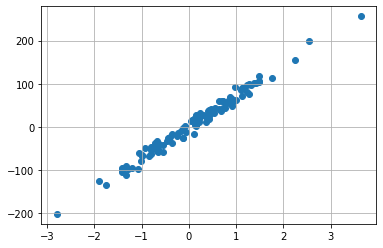

In [69]:
plt.scatter(X1, y1)
plt.grid()
plt.show()


In [70]:
X2, y2 = make_regression(n_samples=100, n_features=1, n_targets=1, noise=100, random_state=2021)

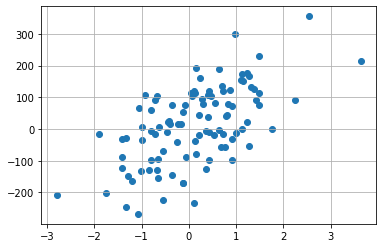

In [71]:
plt.scatter(X2, y2)
plt.grid()
plt.show()

In [72]:
lr1 = LinearRegression()
lr1.fit(X1, y1)
lr1.score(X1, y1)

0.9827855106643268

In [73]:
lr2 = LinearRegression()
lr2.fit(X2, y2)
lr2.score(X2, y2)

0.3644244725778779

In [74]:
weight, bias = lr1.coef_, lr1.intercept_
residue = lr1._residues
print(f'기울기 : {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱 : {residue:.4f}')

기울기 : 71.7820, 절편: 0.4538, 잔차제곱 : 9331.9517


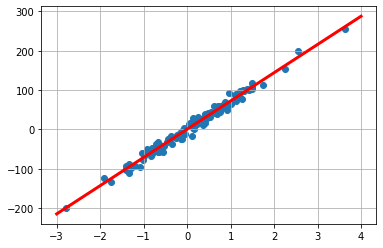

In [76]:
plt.scatter(X1, y1)
plt.plot([-3, 4], [lr1.coef_[0]*-3+lr1.intercept_, lr1.coef_[0]*4+lr1.intercept_], 'r', lw=3)
plt.grid()
plt.show()

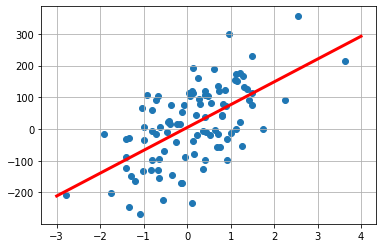

In [77]:
plt.scatter(X2, y2)
plt.plot([-3, 4], [lr2.coef_[0]*-3+lr2.intercept_, lr2.coef_[0]*4+lr2.intercept_], 'r', lw=3)
plt.grid()
plt.show()

In [78]:
weight, bias = lr1.coef_, lr1.intercept_
residue = lr1._residues
print(f'기울기 : {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱 : {residue:.4f}')

기울기 : 71.7820, 절편: 0.4538, 잔차제곱 : 9331.9517


In [79]:
weight, bias = lr2.coef_, lr2.intercept_
residue = lr2._residues
print(f'기울기 : {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱 : {residue:.4f}')

기울기 : 71.9372, 절편: 4.5383, 잔차제곱 : 933195.1691


In [ ]:
### 당뇨 vs 혈압

In [81]:
X = df.bp.values.reshape(-1, 1)
y = df.target.values

In [82]:
X.shape

(442, 1)

In [83]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [84]:
weight, bias = lr.coef_, lr.intercept_
residue = lr._residues
print(f'기울기 : {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱 : {residue:.4f}')

기울기 : 714.7416, 절편: 152.1335, 잔차제곱 : 2110153.5072


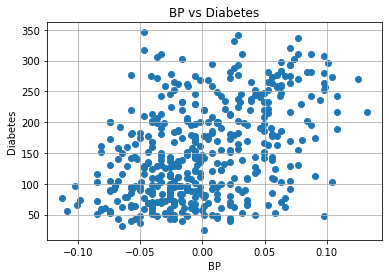

In [86]:
plt.scatter(X, y)
#plt.plot([-0.1, 0.18], [weight[0]*-0.1+bias, weight[0]*0.18+bias], 'r', lw=3)
plt.title("BP vs Diabetes")
plt.xlabel("BP")
plt.ylabel("Diabetes")
plt.grid()
plt.show()

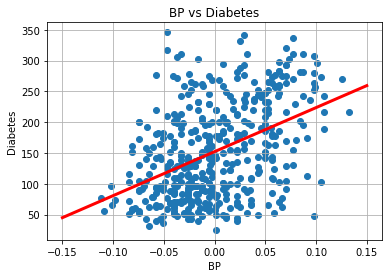

In [87]:
plt.scatter(X, y)
plt.plot([-0.15, 0.15], [lr.coef_[0]*-0.15+lr.intercept_, lr.coef_[0]*0.15+lr.intercept_], 'r', lw=3)
plt.title("BP vs Diabetes")
plt.xlabel("BP")
plt.ylabel("Diabetes")
plt.grid()
plt.show()

In [88]:
score = lr.score(X, y)
print(f'R_Squared score : {score:.4f}')

R_Squared score : 0.1949
